## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [12]:
df.head()
# df.tail()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [16]:
df.columns
df.shape
df.count()

m             2775
TagName       2775
Unnamed: 2    2775
dtype: int64

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
df["Unnamed: 2"].count()

np.int64(2775)

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [18]:
df.groupby("TagName").sum()

,m,Unnamed: 2
TagName,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45053
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407615
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624565
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813798
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52434
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74342
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919489
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531047
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68318


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [19]:
df.groupby("TagName").count()

,m,Unnamed: 2
TagName,,
assembly,200,200
c,200,200
c#,201,201
c++,200,200
delphi,200,200
go,185,185
java,200,200
javascript,200,200
perl,200,200


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# convert the first column to more readable date format
df["m"] = pd.to_datetime(df.m)
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [22]:
reshaped_df = df.pivot(index="m", columns="TagName", values="Unnamed: 2")
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,753.0,104.0,NaN,1122.0,630.0,129.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,303.0,1984.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [24]:
reshaped_df.shape

(201, 14)

In [25]:
reshaped_df.count()

TagName
assembly      200
c             200
c#            201
c++           200
delphi        200
go            185
java          200
javascript    200
perl          200
php           200
python        200
r             198
ruby          200
swift         191
dtype: int64

In [ ]:
reshaped_df.columns
# fill NaN values with 0
reshaped_df.fillna(0, inplace=True)

In [ ]:
# check for NaN values
reshaped_df.isna().values.any()

np.False_

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [32]:
reshaped_df.count()

TagName
assembly      201
c             201
c#            201
c++           201
delphi        201
go            201
java          201
javascript    201
perl          201
php           201
python        201
r             201
ruby          201
swift         201
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

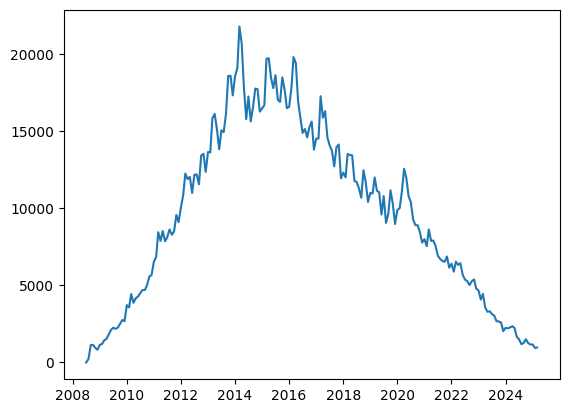

In [ ]:
"""
plot the data
plt.plot()
first value is the index of the reshaped_df dataframe
# second value is the column name
you will the chart
"""
plt.plot(reshaped_df.index, reshaped_df["java"])

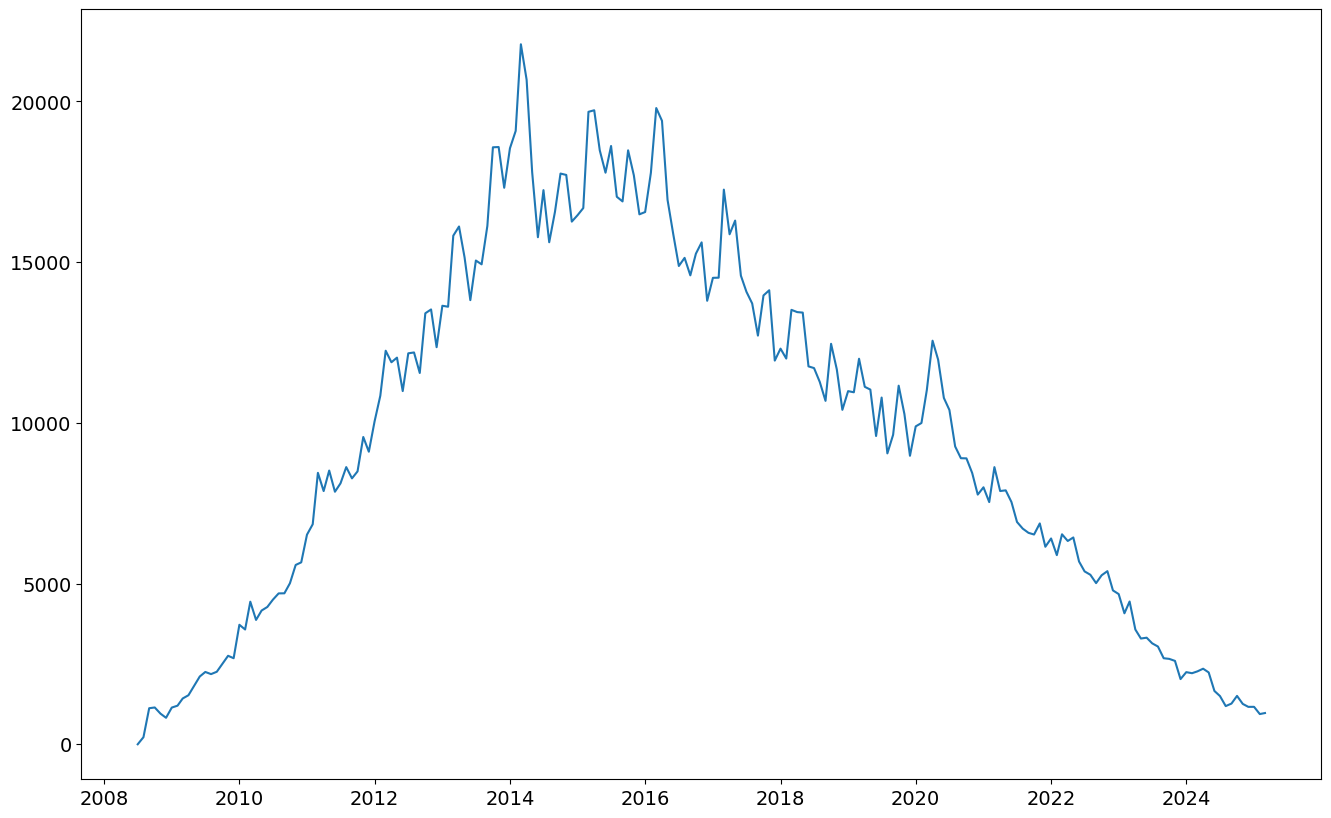

In [39]:
# Style the chart
plt.figure(figsize=(16, 10)) # set the figure size
plt.xticks(fontsize=14) # set the x-axis tick font size
plt.yticks(fontsize=14) # set the y-axis tick font size
plt.plot(reshaped_df.index, reshaped_df["java"])

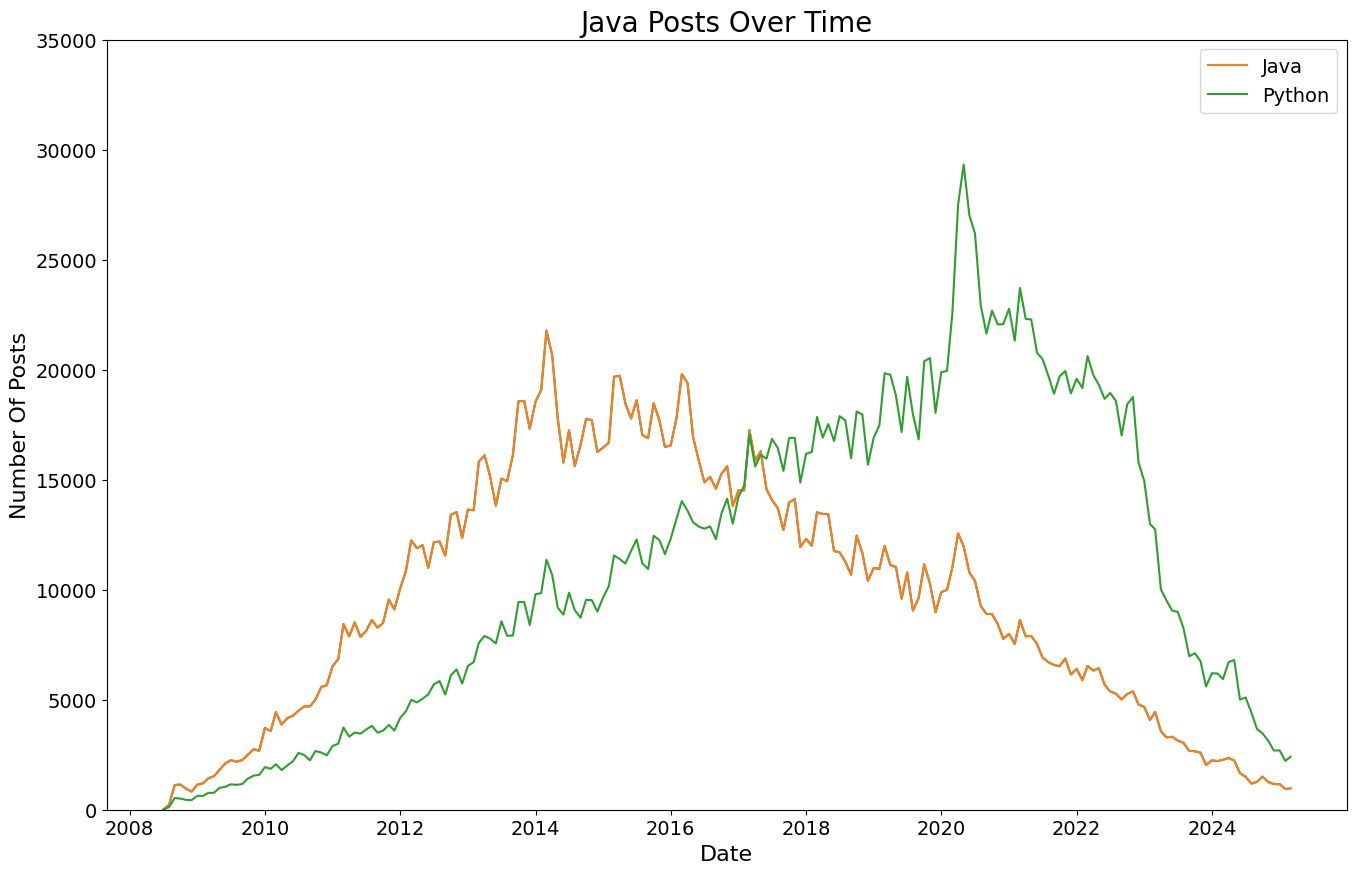

In [ ]:
# # Style the chart
# plt.figure(figsize=(16, 10)) # set the figure size
# plt.xticks(fontsize=14) # set the x-axis tick font size
# plt.yticks(fontsize=14) # set the y-axis tick font size
# plt.plot(reshaped_df.index, reshaped_df["java"])
# plt.xlabel("Date", fontsize=16) # set the x-axis label font size
# plt.ylabel("Number Of Posts", fontsize=16) # set the y-axis label font size
# plt.ylim(0, 35000) # set the y-axis limit
# plt.title("Java Posts Over Time", fontsize=20) # set the title font size
# plt.plot(reshaped_df.index, reshaped_df["java"], label="Java") # plot the data
# plt.plot(reshaped_df.index, reshaped_df["python"], label="Python") # plot the data
# plt.legend(fontsize=14) # set the legend font size, that way we can make a difference between the two lines

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

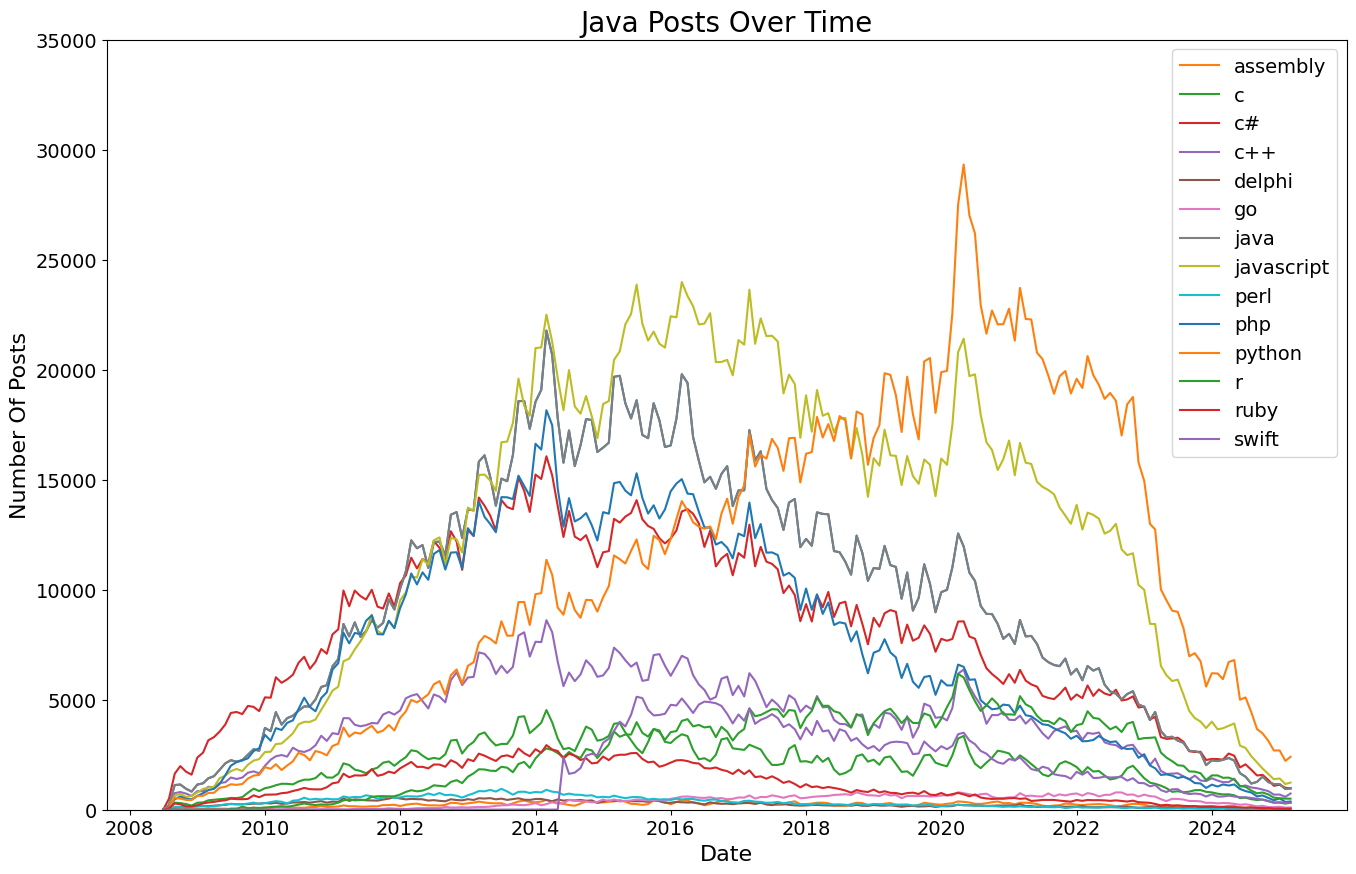

In [ ]:
# Style the chart
plt.figure(figsize=(16, 10)) # set the figure size
plt.xticks(fontsize=14) # set the x-axis tick font size
plt.yticks(fontsize=14) # set the y-axis tick font size
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.xlabel("Date", fontsize=16) # set the x-axis label font size
plt.ylabel("Number Of Posts", fontsize=16) # set the y-axis label font size
plt.ylim(0, 35000) # set the y-axis limit
plt.title("Java Posts Over Time", fontsize=20) # set the title font size

# 1st way to plot 2 items
# plt.plot(reshaped_df.index, reshaped_df["java"], label="Java") # plot the data
# plt.plot(reshaped_df.index, reshaped_df["python"], label="Python") # plot the data

# 2nd way to plot 2 items using a for cycle (looks very ugly)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column) # plot the data
plt.legend(fontsize=14) # set the legend font size, that way we can make a difference between the two lines

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

Text(0.5, 1.0, 'Programming languages posts over time')

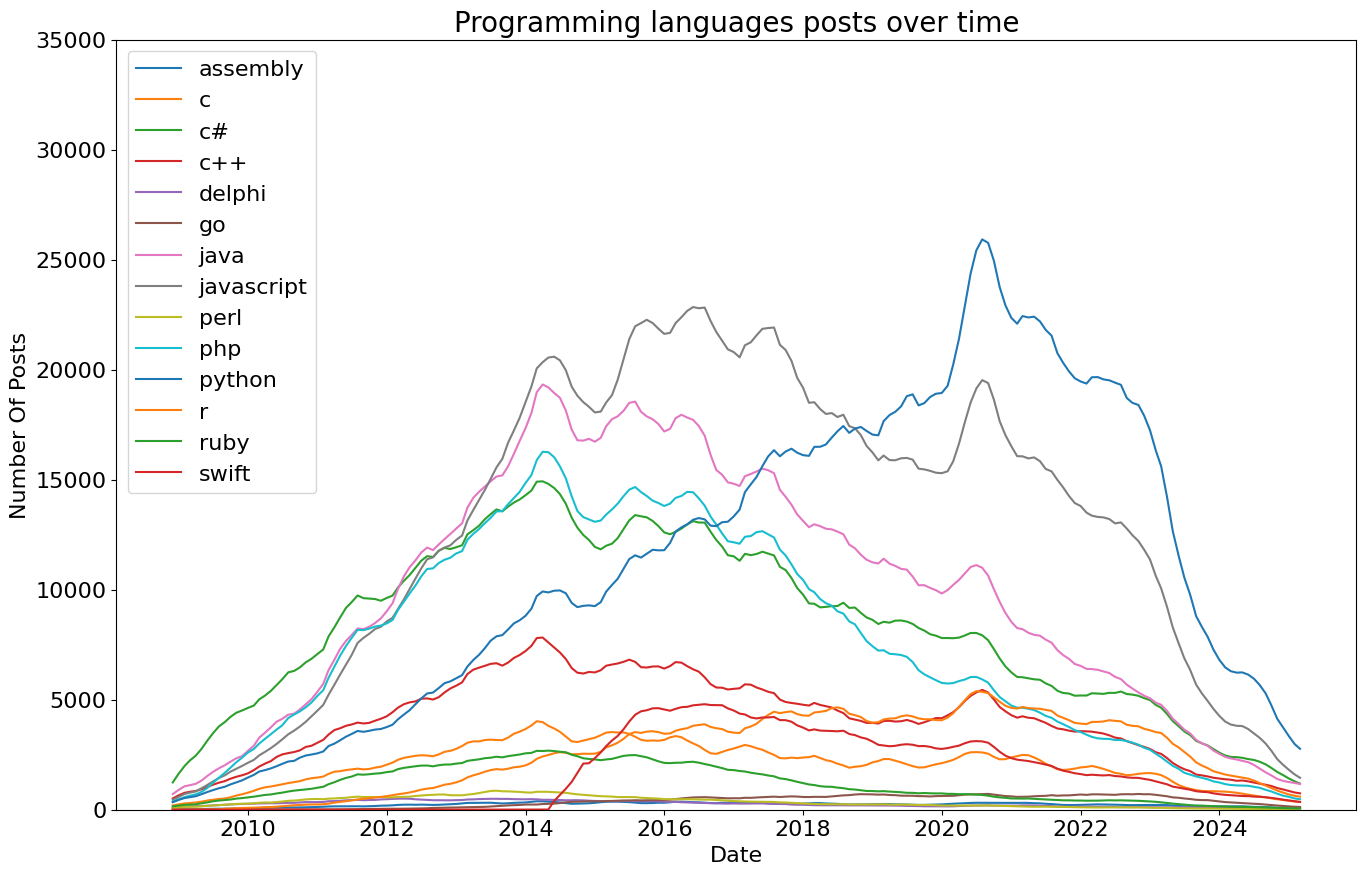

In [50]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Number Of Posts", fontsize=16)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=column) # plot the data
plt.legend(fontsize=16) # set the legend font size, that way we can make a difference between the two lines
plt.title("Programming languages posts over time", fontsize=20) # set the title font size

## Learning Points & Summary
### Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.